In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importación del conjunto de datos

In [2]:
import kagglehub
import os


path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)


# Nombre del archivo CSV dentro del directorio
file_name = "creditcard.csv"

# Construye la ruta completa al archivo CSV
csv_file_path = os.path.join(path, file_name)

# Lee el archivo CSV en un DataFrame de pandas
try:
    data = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print(f"\n❌ Error: No se encontró el archivo en la ruta: {csv_file_path}")
except Exception as e:
    print(f"\n❌ Ocurrió un error al leer el archivo CSV: {e}")

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


Analisis exploratorio

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Como podemos ver, los nombres de las variables estan ocultos para preservar la información de los clientes, hecho que nos hace perder interpretabilidad de lo que significa que una variable tenga determinado peso.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Conteo de Transacciones por clase

In [6]:
print("Conteo de transacciones por clase:")
print(data["Class"].value_counts())

Conteo de transacciones por clase:
Class
0    284315
1       492
Name: count, dtype: int64


In [7]:

cantidad_fraudes=data["Class"].value_counts()[1]
total_transacciones=data.shape[0]
proporcion=round((cantidad_fraudes/total_transacciones)*100,2)
print(f'Total de transacciones {total_transacciones}')
print(f'Total de transacciones fraudulentas {cantidad_fraudes}')
print(f'Proporción de transacciones fraudulentas: {proporcion} %')

Total de transacciones 284807
Total de transacciones fraudulentas 492
Proporción de transacciones fraudulentas: 0.17 %


Como podemos ver, solo el 0,17% de las transacciones son fraudulentas. Estamos ante un conjunto de datos desbalanceado

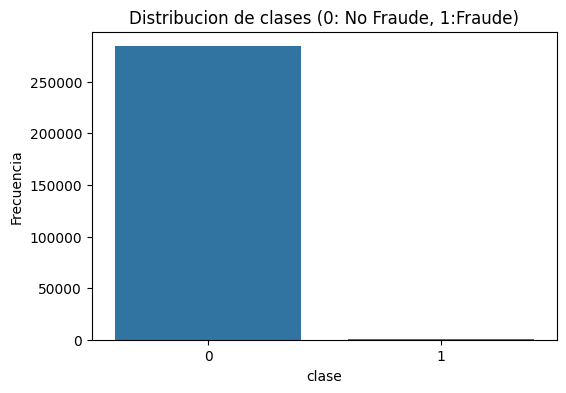

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class",data=data)
plt.title("Distribucion de clases (0: No Fraude, 1:Fraude)")
plt.xlabel("clase")
plt.ylabel("Frecuencia")
plt.show()

Escalado de las variables Amount y Time

In [9]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
data["amount_scaled"]=scaler.fit_transform(data["Amount"].values.reshape(-1,1))
data["time_scaled"]=scaler.fit_transform(data["Time"].values.reshape(-1,1))

data_scaled=data.drop(["Time","Amount"],axis=1)



Dividimos los datos en variables predictoras y variable target.

In [10]:
X=data_scaled.drop("Class",axis=1)
y=data_scaled["Class"]

Dividimos en conjunto de entrenamiento y test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Abordamos la complejidad del desbalance de datos. Vamos a utilizar SMOTE, que es un metodo que genera datos sinteticos de la clase que menos tiene, balanceando el conjunto.

In [13]:
pip install imbalanced-learn

In [14]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

X_resampled,y_resampled=smote.fit_resample(X_train,y_train)

Ahora verificamos la nueva distribucion

In [15]:
y_resampled.value_counts()

,count
Class,
0,227451
1,227451


Entrenamiento de Regresión logística

In [16]:
from sklearn.linear_model import LogisticRegression
import time

In [17]:
log_reg=LogisticRegression(solver="liblinear",random_state=42)

print("Iniciando entrenamiento...")
start_time=time.time()


log_reg.fit(X_resampled,y_resampled)

end_time=time.time()

print(f'Entrenamiento finalizado en : {end_time - start_time:.2f} segundos')

Iniciando entrenamiento...
Entrenamiento finalizado en : 18.19 segundos


Predicciones y evaluacion del modelo

In [18]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred=log_reg.predict(X_test)
y_proba=log_reg.predict_proba(X_test)[:,1]
roc_auc=roc_auc_score(y_test,y_proba)
fpr, tpr , thresholds = roc_curve(y_test, y_proba)
roc_auc=auc(fpr,tpr)

print(f'ROC auc score: {roc_auc:.4f}')

ROC auc score: 0.9714


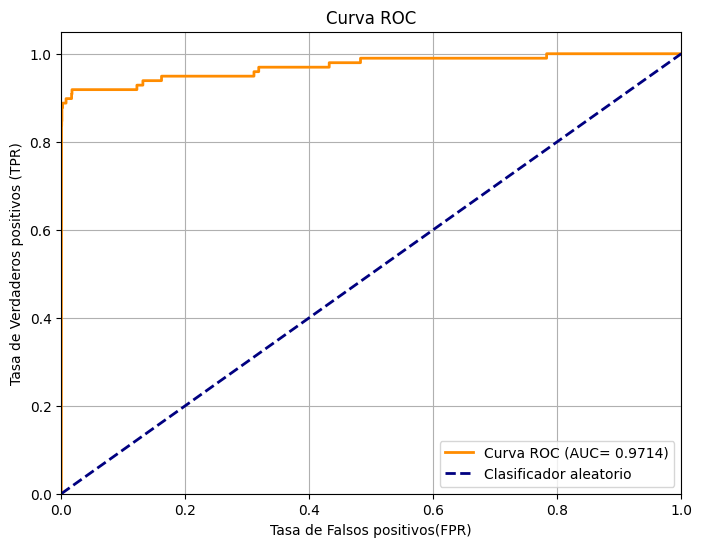

In [19]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2, label=f'Curva ROC (AUC= {roc_auc:.4f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Tasa de Falsos positivos(FPR)')
plt.ylabel('Tasa de Verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report


conf_matrix=confusion_matrix(y_test,y_pred)

print("Matriz de confusión")

print(conf_matrix)

Matriz de confusión
[[55429  1435]
 [    8    90]]


In [21]:
print("Reporte de clasificación")

print(classification_report(y_test,y_pred))



Reporte de clasificación
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<Figure size 800x600 with 0 Axes>

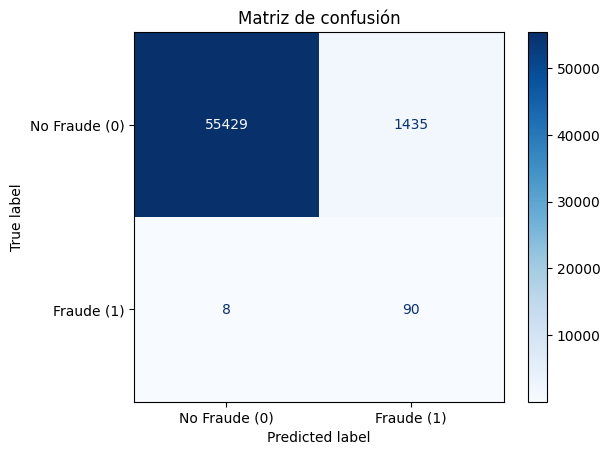

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
class_labels=["No Fraude (0)","Fraude (1)"]

plt.figure(figsize=(8,6))
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues,values_format="d")
plt.title("Matriz de confusión")
plt.show()



Interpretacion de los resultados

Cuando trabajamos con datos desbalanceados como es el caso de la detección de fraude, no tiene sentido observar la precisión, ya que, por ejemplo, un modelo que prediga todos los casos como negativos tendría una precision muy cercana a 1.

En este caso vamos a priorizar el recall, ya que lo que busco es disminuir al minimo los falsos negativos, teniendo en cuenta que un falso negativo implica un fraude no detectado.

En este caso, el recall de la clase 1 (Fraude) es de 0.92, es decir que mi modelo capturó el 92% de los casos de fraude, esto ocurrió a expensas de una presición muy baja (6%). Este porcentaje tan bajo se da porque el modelo etiqueto 1435 casos que en realidad no eran fraude como positivos, esto nos dice que el 94% de las alertas son falsas alarmas.

Estas metricas fueron obtenidas con un umbral de 0.5, utilizado por defecto. El siguiente paso es detectar el umbral optimo.

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)


#Definimos el recall minimo que buscamos
recall_objetivos=[0.9,0.85,0.8]

print("Analisis de umbrales por Recall")
print("-------------------------------")

for recall_minimo in recall_objetivos:



  recall_cumple_indices = np.where(recall[:-1] >=recall_minimo)[0] #Tomamos aquellos valores que cumplen con el recall >= 0.9

  if len(recall_cumple_indices) == 0:
     print(f'No hay valores que cumplen con un recall mayor o igual a {recall_minimo}')
  else:
    precision_cumple = precision[:-1][recall_cumple_indices]  #Obtememos la presicion para los valores que cumplen con la condicion de recall
    indice_precision_max=np.argmax(precision_cumple) #Indice del valor maximo de precision que cumple con recall >=90
    mejor_indice=recall_cumple_indices[indice_precision_max] #Elijo la posicion (indice) donde se cumple que recall esta por encima de 0.9 y tiene la precision mas alta

    mejor_umbral=thresholds[mejor_indice]
    precision_mejor_umbral=precision[mejor_indice]
    recall_mejor_umbral=recall[mejor_indice]

    print(f'Valores obtenidos con recall de {recall_minimo}')
    print(f'Mejor umbral: {mejor_umbral:.2f}')
    print(f'Precision en el umbral {mejor_umbral:.2f} : {precision_mejor_umbral:.2f}')
    print(f'Recall en el umbral {mejor_umbral:.2f} : {recall_mejor_umbral:.2f}')
    print("---------------------------------------")



Analisis de umbrales por Recall
-------------------------------
Valores obtenidos con recall de 0.9
Mejor umbral: 0.63
Precision en el umbral 0.63 : 0.09
Recall en el umbral 0.63 : 0.91
---------------------------------------
Valores obtenidos con recall de 0.85
Mejor umbral: 0.99
Precision en el umbral 0.99 : 0.60
Recall en el umbral 0.99 : 0.88
---------------------------------------
Valores obtenidos con recall de 0.8
Mejor umbral: 1.00
Precision en el umbral 1.00 : 0.83
Recall en el umbral 1.00 : 0.82
---------------------------------------


Elegimos el umbral 0.99, ya que a expensas de un 3% en la baja del Recall, mejoramos la precision en un 51%

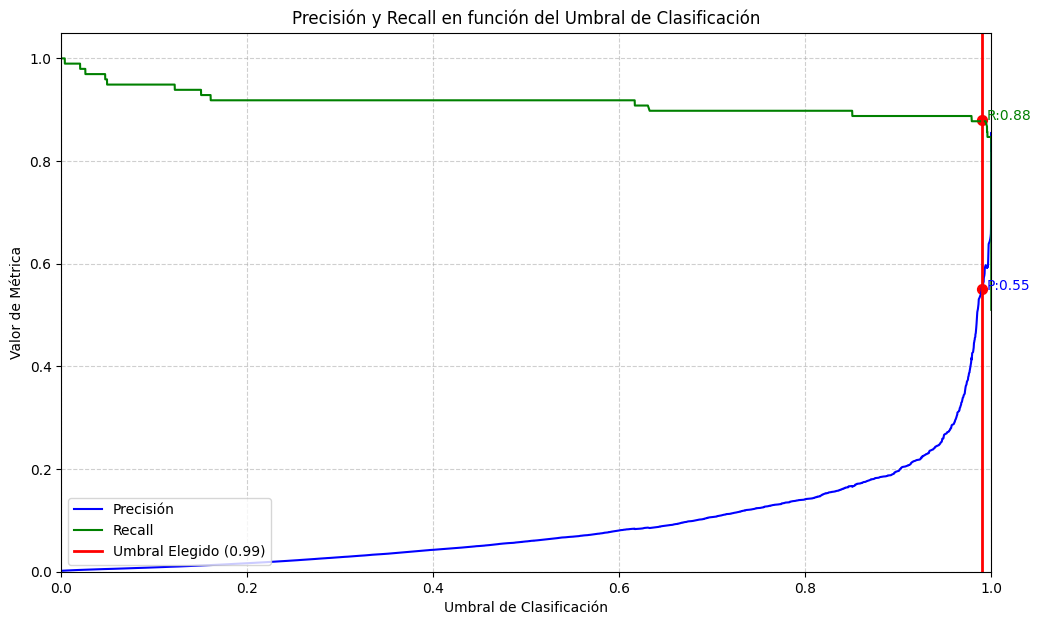

In [24]:

umbral_elegido = 0.99
precision_mejor_umbral = 0.55 #Segun el reporte de clasificacion
recall_mejor_umbral = 0.88


plt.figure(figsize=(12, 7))
plt.title('Precisión y Recall en función del Umbral de Clasificación')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Valor de Métrica')
plt.grid(True, linestyle='--', alpha=0.6)


plt.plot(thresholds, precision[:-1], label='Precisión', color='blue')


plt.plot(thresholds, recall[:-1], label='Recall', color='green')

plt.axvline(umbral_elegido, color='red', linestyle='-', linewidth=2,
            label=f'Umbral Elegido ({umbral_elegido})')


plt.scatter(umbral_elegido, precision_mejor_umbral, color='red', s=50)
plt.scatter(umbral_elegido, recall_mejor_umbral, color='red', s=50)

# Anotación
plt.text(umbral_elegido + 0.005, recall_mejor_umbral,
         f'R:{recall_mejor_umbral:.2f}', color='green')
plt.text(umbral_elegido + 0.005, precision_mejor_umbral,
         f'P:{precision_mejor_umbral:.2f}', color='blue')

plt.legend(loc='lower left')
plt.ylim([0.0, 1.05]) # Asegurar que el eje Y vaya de 0 a 1
plt.xlim([0.0, 1.0]) # Asegurar que el eje X vaya de 0 a 1
plt.show()

<Figure size 800x600 with 0 Axes>

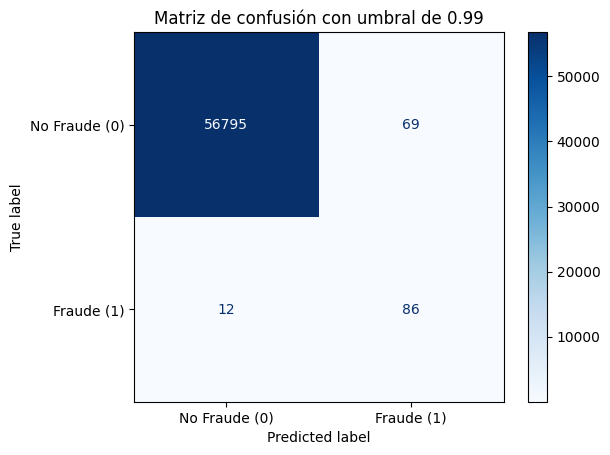

              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     56864
      Fraude       0.55      0.88      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
umbral_elegido=0.99

y_pred_final = np.where(y_proba >= umbral_elegido, 1, 0) #Recorre el array de y_pred, si es >=0.99 lo cataloga como 1, si no com0 0

matriz_conf=confusion_matrix(y_test,y_pred_final)

class_labels=["No Fraude (0)","Fraude (1)"]

plt.figure(figsize=(8,6))
disp=ConfusionMatrixDisplay(matriz_conf,display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues,values_format="d")
plt.title("Matriz de confusión con umbral de 0.99")
plt.show()


print(classification_report(y_test,y_pred_final,target_names=["No Fraude","Fraude"]))

Features importance


In [26]:

coeficientes = log_reg.coef_[0]

feature_importance = pd.Series(coeficientes, index=X_train.columns)

importance_sorted = feature_importance.abs().sort_values(ascending=False)

print("Importancia de Características (Coeficientes de Regresión Logística)")
print("----------------------------------------------------------------------")
print(importance_sorted.head(10))

Importancia de Características (Coeficientes de Regresión Logística)
----------------------------------------------------------------------
V14            1.734621
V10            1.486202
V17            1.325503
V20            1.316420
V16            1.224151
V12            1.089768
V4             1.068836
V28            1.017261
time_scaled    0.940867
V5             0.932792
dtype: float64


Las variables mas determinantes para detectar una transaccion fraudulenta son : V14, V10, V17, V20, V16

In [37]:

importance_to_plot = importance_sorted.iloc[::-1]

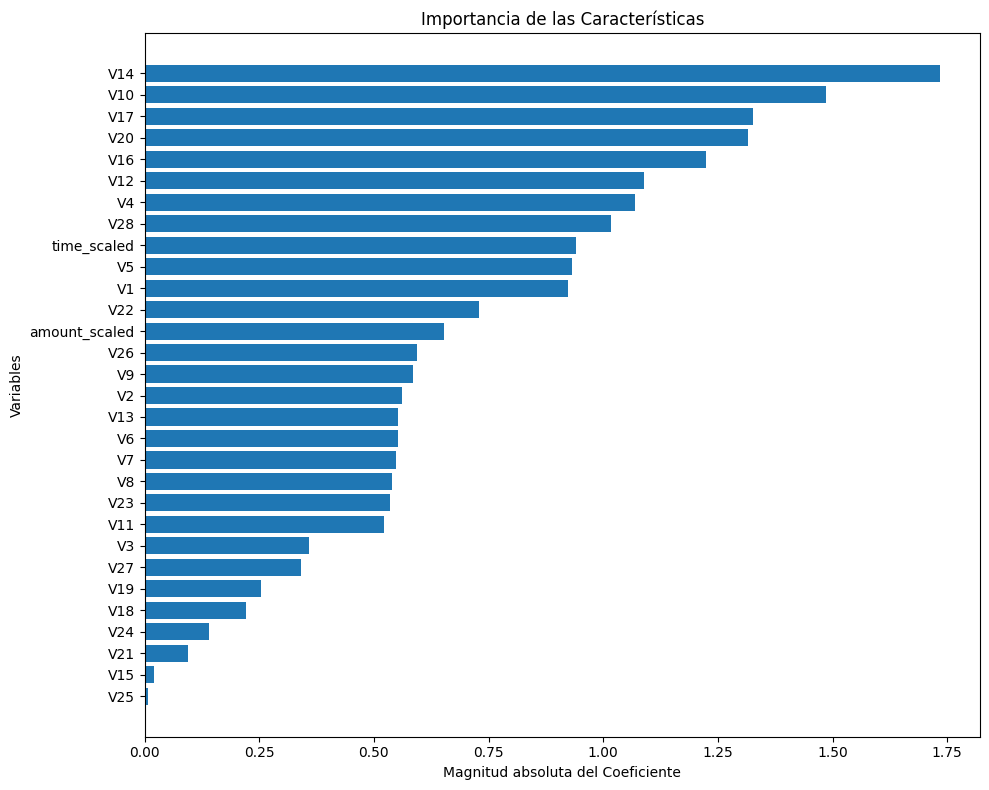

In [38]:



plt.figure(figsize=(10,8))
plt.barh(importance_to_plot.index,
         importance_to_plot.values)
plt.title("Importancia de las Características")
plt.xlabel("Magnitud absoluta del Coeficiente")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

Con el modelo de Regresión Logística, que captura solo relaciones lineales, pudimos llegar a un límite de Recall=0.88 y Precision=0.55.


La decision es pasar a un modelo mas complejo que nos permita llegar a niveles mas altos de Recall y Precision, elegimos el modelo XGBoost.

Calculo de la proporcion de Clase Negativa(No Fraude) respecto de la Positiva(Fraude) para manejar el desbalance de clases.

In [39]:
fraude=y_train.value_counts()[1]
nofraude=y_train.value_counts()[0]


scale_pos_weight=nofraude/fraude

print(f'La proporción de desbalance es 1: {scale_pos_weight}')

La proporción de desbalance es 1: 577.2868020304569


Por cada fraude tenemos 577 no fraudes

Ahora realizamos el entrenamiento del XGBoost

In [41]:
import xgboost as xgb


xgb_clf= xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)


xgb_clf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:36:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluación incial, con el umbral por defecto de 0,5

In [42]:
y_pred_proba_xgb=xgb_clf.predict_proba(X_test)[:,1]   #Obtengo las probabilidades de clase positiva

In [44]:
y_pred_xgb_default= (y_pred_proba_xgb >= 0.5).astype(int)  #Aplico el umbral 0.5

In [45]:
print("Reporte de Clasificacion con Umbral de 0.5")

print(classification_report(y_test,y_pred_xgb_default))

Reporte de Clasificacion con Umbral de 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



Obtuvimos una mejora en la precision respecto de la Regresión Logística, de 0.55 pasamos a 0.76, es decir que ahora solo el 24% de los casos son falsas alarmas. Sin embargo, el recall pasó de 0.88 a 0.84, si bien sigue siendo alto, bajó respecto de la regresión logística.

Ajuste del umbral optimo

In [47]:
precision_xgb,recall_xgb,threshold_xgb=precision_recall_curve(y_test,y_pred_proba_xgb)


min_recall_target_xgb=0.85
mejor_precision_xgb=0
mejor_umbral_xgb=0


for p,q,r in zip(precision_xgb,recall_xgb,threshold_xgb):
  if q>= min_recall_target_xgb:
    mejor_precision_xgb=p
    mejor_umbral_xgb=r
print(f'Analisis de Umbral para XGBoost (Recall Objetivo >= {min_recall_target_xgb})')
print(f'Umbral Optimo encontrado: {mejor_umbral_xgb:.4f}')
print(f'Precision resultante: {mejor_precision_xgb:.4f}')

Analisis de Umbral para XGBoost (Recall Objetivo >= 0.85)
Umbral Optimo encontrado: 0.3178
Precision resultante: 0.6667


Evaluación con el umbral obtenido

In [48]:
y_pred_xgb_optimizado=(y_pred_proba_xgb>= mejor_umbral_xgb).astype(int)

print("Reporte de Clasificación con Umbral Optimizado")
print(classification_report(y_test,y_pred_xgb_optimizado))

Reporte de Clasificación con Umbral Optimizado
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Con el umbral optimo, obtuvimos una mejora en el Recall 0.86, mientras que la precision desciende a 0.67 existiendo 33% de falsas alarmas.


Nos quedamos con el umbral de 0.5, ya que tiene un Recall de 0.84 (solo 2% de diferencia), y una precision mucho mas alta 76%.

Curva precision-recall

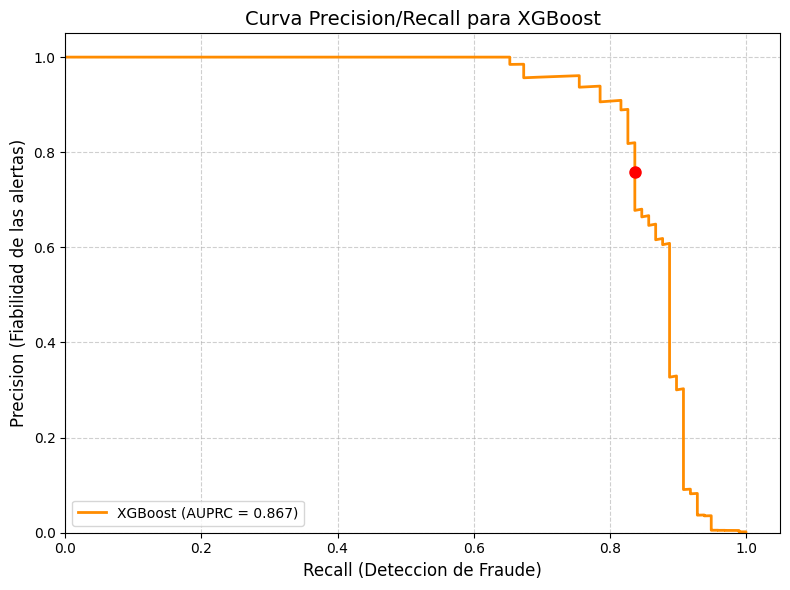

In [53]:
pr_auc=auc(recall_xgb,precision_xgb)

plt.figure(figsize=(8,6))
plt.plot(recall_xgb,precision_xgb, label= f'XGBoost (AUPRC = {pr_auc:.3f})',color="darkorange",lw=2)
plt.xlabel("Recall (Deteccion de Fraude)", fontsize=12)
plt.ylabel("Precision (Fiabilidad de las alertas)", fontsize=12)
plt.title("Curva Precision/Recall para XGBoost",fontsize=14)
plt.grid(True,linestyle="--",alpha=0.6)
plt.legend(loc="lower left")

idx=np.argmin(np.abs(threshold_xgb - 0.5))
plt.plot(recall_xgb[idx], precision_xgb[idx], "o", color= "red", markersize=8, label=f"Umbral 0.5 (P={precision_xgb[idx]:.2f}, R={recall_xgb[idx]:.2f}")
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.tight_layout()

plt.show()